# Plots for years experiments
Python code to generate the plots from the matlab experiments.

In [1]:
import scipy.io as spio
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
#matplotlib.rcParams['ps.useafm'] = True
#matplotlib.rcParams['pdf.use14corefonts'] = True
#matplotlib.rcParams['text.usetex'] = True

params =  {'pdf.fonttype' : 42,
          'legend.fontsize': 14,
          'axes.labelsize': 18,
          'axes.titlesize': 20,
          'xtick.labelsize' :14,
          'ytick.labelsize': 14,
          'mathtext.fontset' : 'stix',
          'mathtext.rm'      : 'serif',
          'font.family'      : 'serif',
          'font.serif'       : "Times New Roman", # or "Times"          
         }
matplotlib.rcParams.update(params)

In [3]:
pwd

'/Users/cdickens/Desktop/hlr-clean/high-leverage-rows-camera-ready/figures'

In [4]:
# Load in all of the generated data
mat_identity = spio.loadmat('../scripts/years/regression/years_identity.mat', squeeze_me=True)
mat_orth = spio.loadmat('../scripts/years/regression/years_orth.mat', squeeze_me=True)
mat_spc3 = spio.loadmat('../scripts/years/regression/years_condition_spc3.mat', squeeze_me=True)
mat_uniform = spio.loadmat('../scripts/years/regression/years_uniform_sampling_final.mat', squeeze_me=True)


In [5]:
mat_uniform

{'__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Sat Jun  2 12:34:58 2018',
 '__version__': '1.0',
 'approx_regression_time': array([ 1.35153218,  4.05203565,  8.92595184, 15.60818221, 24.980874  ,
        34.01333112]),
 'block_sizes': array([ 2500,  5000,  7500, 10000, 12500, 15000], dtype=uint16),
 'error': array([0.4047863 , 0.30137094, 0.23215366, 0.17661781, 0.16520785,
        0.12810965]),
 'number_of_samples': 50000}

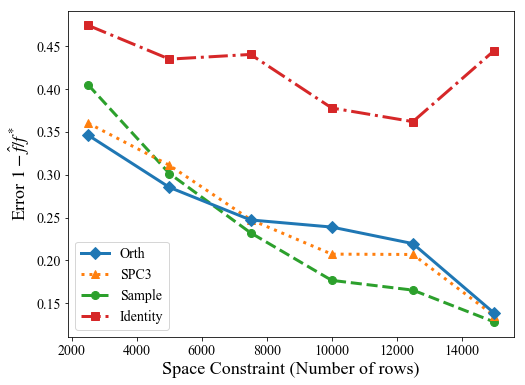

In [6]:
# Error vs block size plot
fig, ax = plt.subplots(figsize=(8,6))


ax.plot( mat_orth['block_sizes'], mat_orth['error'],'-D', label = 'Orth', linewidth=3.0, markersize=8, zorder=10)
ax.plot( mat_spc3['block_sizes'], mat_spc3['error'], ':^', label = 'SPC3', linewidth=3.0, markersize=8, zorder=8)
ax.plot( mat_uniform['block_sizes'], mat_uniform['error'], '--o', label = 'Sample',linewidth=3.0, markersize=8, zorder=4)
ax.plot( mat_identity['block_sizes'], mat_identity['error'], '-.s', label = 'Identity', linewidth=3.0, markersize=8, zorder=2)


#ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_ylabel('Error $1 - \hat{f}/f^*$')
ax.set_xlabel('Space Constraint (Number of rows)')
#ax.set_title("Error vs Block Size")
ax.legend(loc=3, fancybox=True)



fig.savefig('years_error_vs_block_size.pdf', dpi=1000, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=True)

Identity method removed as consistently outputting empty blocks and hence $\hat{f}=0$.  Can be included if necessary cf. census plotting notebook.  The value $\hat{f}$ is the approximation of the LP from the summary. 

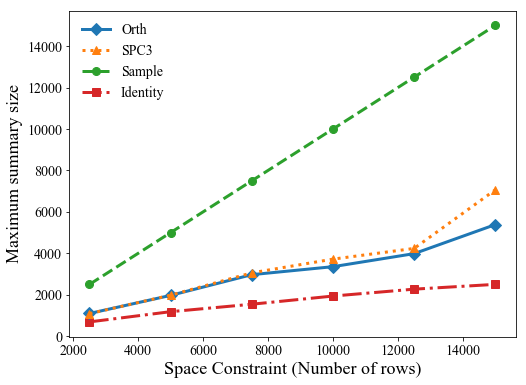

In [7]:
# Max summary size vs block size

fig, ax = plt.subplots(figsize=(8,6))


ax.plot( mat_orth['block_sizes'], mat_orth['storage'],'-D', label = 'Orth', linewidth=3.0, markersize=8, zorder=8)
ax.plot( mat_spc3['block_sizes'], mat_spc3['storage'], ':^', label = 'SPC3', linewidth=3.0, markersize=8, zorder=10)
ax.plot( mat_uniform['block_sizes'], mat_uniform['block_sizes'], '--o', label = 'Sample',linewidth=3.0, markersize=8, zorder=4)
ax.plot( mat_identity['block_sizes'], mat_identity['storage'], '-.s', label = 'Identity', linewidth=3.0, markersize=8, zorder=2)

ax.set_ylabel('Maximum summary size')
ax.set_xlabel('Space Constraint (Number of rows)')
#ax.set_title("Max rows stored (in stream) vs Block Size")
ax.legend(loc=0, frameon=False)

fig.savefig('years_space_vs_block_size.pdf', dpi=1000, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=True)

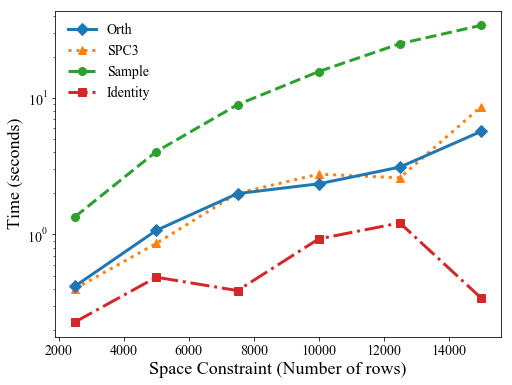

In [8]:
# Time to solve regression - clearly blows up

fig, ax = plt.subplots(figsize=(8,6))

ax.plot( mat_orth['block_sizes'], mat_orth['approx_regression_time'],'-D', label = 'Orth', linewidth=3.0, markersize=8, zorder=10)
ax.plot( mat_spc3['block_sizes'], mat_spc3['approx_regression_time'], ':^', label = 'SPC3', linewidth=3.0, markersize=8, zorder=8)
ax.plot( mat_uniform['block_sizes'], mat_uniform['approx_regression_time'], '--o', label = 'Sample',linewidth=3.0, markersize=8, zorder=4)
ax.plot( mat_identity['block_sizes'], mat_identity['approx_regression_time'], '-.s', label = 'Identity', linewidth=3.0, markersize=8, zorder=2)
ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_ylabel('Time (seconds)')
ax.set_xlabel('Space Constraint (Number of rows)')
#ax.set_title("Time to solve regression vs Block Size")
ax.legend(loc=0, frameon=False)

fig.savefig('years_regression_time_vs_block_size.pdf', dpi=1000, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=True)

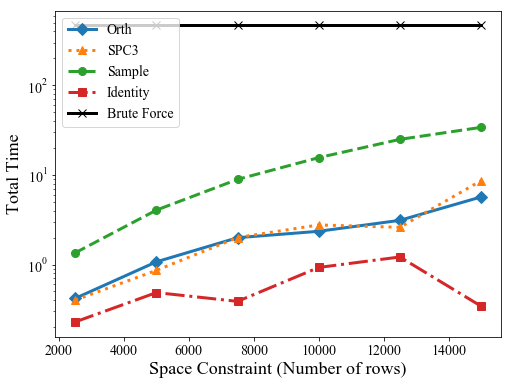

In [9]:
# Total time

plotting_length  = mat_spc3['block_sizes'].shape[0]
full_regression_time = mat_spc3['full_regression_time'][0:plotting_length]

fig, ax = plt.subplots(figsize=(8,6))

ax.plot( mat_orth['block_sizes'], mat_orth['total_time'],'-D', label = 'Orth', linewidth=3.0, markersize=8, zorder=8)
ax.plot( mat_spc3['block_sizes'], mat_spc3['total_time'], ':^', label = 'SPC3', linewidth=3.0, markersize=8, zorder=10)
ax.plot( mat_uniform['block_sizes'], mat_uniform['approx_regression_time'], '--o', label = 'Sample',linewidth=3.0, markersize=8, zorder=4)
ax.plot( mat_identity['block_sizes'], mat_identity['total_time'], '-.s', label = 'Identity', linewidth=3.0, markersize=8, zorder=2)
ax.plot(mat_spc3['block_sizes'], full_regression_time, '-x', color='black', label = 'Brute Force',linewidth=3.0, markersize=8)
ax.set_yscale('log')
#ax.plot(mat_spc3['block_sizes'], mat_spc3['full_regression_time'], color='black', label = 'Brute Force',linewidth=3.0)
ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_ylabel('Total Time')
ax.set_xlabel('Space Constraint (Number of rows)')
#ax.set_title("Total Time  vs Block Size")
ax.legend(loc=2, fancybox=True)

fig.savefig('years_total_time_vs_block_size.pdf', dpi=1000, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=True)

### Basis times

Code to generate the plots which illustrate how long it takes to compute well-conditioned bases.

In [10]:
basis_orth = spio.loadmat('../scripts/years/basis_times/years_condition_spc3_basis_times.mat', squeeze_me=True)
basis_spc3 = spio.loadmat('../scripts/years/basis_times/years_orth_basis_times.mat', squeeze_me=True)


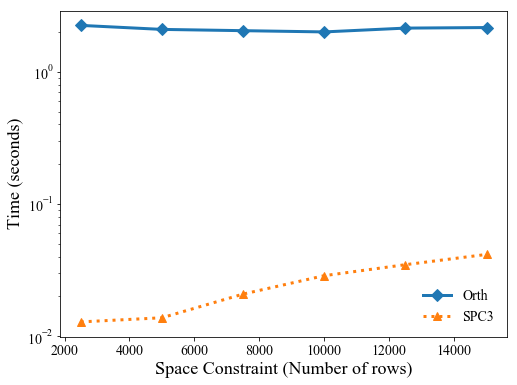

In [11]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot( basis_orth['block_sizes'], basis_orth['time_for_basis'],'-D', label = 'Orth' , markersize=8, linewidth=3.0)
ax.plot( basis_spc3['block_sizes'], basis_spc3['time_for_basis'], ':^',label = 'SPC3', markersize=8, linewidth=3.0)
ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_ylabel('Time (seconds)')
ax.set_xlabel('Space Constraint (Number of rows)')
#ax.set_title("Time to compute basis  vs Block size")
ax.legend(loc=0, frameon=False)


fig.savefig('years_basis_time_vs_block_size.pdf', dpi=1000, facecolor='w', edgecolor='w',
       orientation='portrait', papertype=None,
            transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=True)

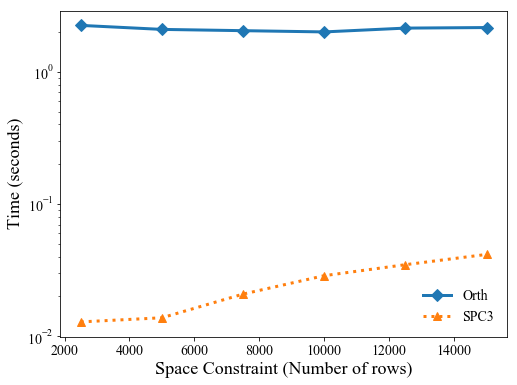

In [12]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot( basis_orth['block_sizes'], basis_orth['time_for_basis'],'-D', label = 'Orth' , markersize=8, linewidth=3.0)
ax.plot( basis_spc3['block_sizes'], basis_spc3['time_for_basis'], ':^',label = 'SPC3', markersize=8, linewidth=3.0)
ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_ylabel('Time (seconds)')
ax.set_xlabel('Space Constraint (Number of rows)')
#ax.set_title("Time to compute basis  vs Block size")
ax.legend(loc=0, frameon=False)